# 简介

* 支持向量：就是支持或支撑平面上把两类类别划分开来的超平面的向量点  
* 机：可以理解为一种算法  
* SVM是一种二分类模型  
* 线性可分支持向量机：通过**硬**间隔最大化，学习一个**线性**分类器  
* 线性支持向量机：通过**软**间隔最大化，学习一个**线性**分类器  
* 非线性支持向量机：通过**核技巧**，学习一个**非线性**分类器  

<img src="img/支持向量机分类.png" width="600px">

# 拉格朗日乘子法求带约束的极值问题

## 等式约束  
求 $f(x)$ 的极值，$s.t. \quad h(x)=0$  
* 构造拉格朗日函数：$L(x,\alpha)=f(x)+\alpha h(x),\alpha\ge 0$
* 求梯度，并令梯度等于0，可得解：$\nabla_xL(x,\alpha)=\nabla_xf(x)+\alpha\nabla_xh(x)=0$  

<img src="img/拉格朗日乘子法等式约束.png" width="900">  

以上图为例，求 $f(x_1,x_2)=x_1+x_2$ 的最小值，$s.t.x_1^2+x_2^2-2=0$。  
在极小值点，$h(x)$ 和 $f(x)$ 的梯度在同一直线上，有 $-\nabla_xf(x)=\alpha\nabla_xh(x)$  
要做到这一点，可以构造一个拉格朗日函数，对函数令偏导等于0求解，恰好等价于“满足上面这个式子，同时使得 $h(x)=0$，原问题转化为对拉格朗日函数求极值问题，这就是拉格朗日乘子法。

## 不等式约束  
考虑目标函数 $f(x_1,x_2)=x_1^2+x_2^2$ 在不等式约束 $g(x_1,x_2)=x_1^2+x_2^2-1\le 0$ 下的极值   
* 显然 $f(x)$ 的极小值为原点 $(0,0)$，落在可行域内。可行域以原点为圆心，半径为1。  
* 这种情况约束不起作用，考虑极小值点 $x^*$，这个时候，$g(x^*)\le 0$，$f(x^*)$ 的梯度等于0  
* 极小值点落在可行域内（不包含边界）

<img src="img/拉格朗日乘子法不等式约束.png" width="300">

考虑目标函数 $f(x_1,x_2)=(x_1-1.1)^2+(x_2+1.1)^2$ 在不等式约束 $g(x_1,x_2)=x_1^2+x_2^2-1\le 0$ 下的极值   
* 显然 $f(x)$ 的极小值为原点 $(1.1,-1.1)$，落在可行域外。可行域以原点为圆心，半径为1。  
* 这种情况约束起作用，要考虑求解 $f(x)$ 在可行域内的极小值点  
* 显然，走到极小值点的时候，$g(x)$ 的梯度和 $f(x)$ 的负梯度同向。因为极小值点在边界上，这个时候 $g(x)$ 等于0
* 极小值点落在可行域外（包含边界）

<img src="img/拉格朗日乘子法不等式约束2.png" width="400">  

总结：  

第一种情况：最小值在可行域内  

$\begin{cases}
g(x^*)<0 \\
\nabla_xf(x^*)=0
\end{cases}$  

第二种情况：最小值在可行域外  

$\begin{cases}
g(x^*)=0 \\
-\nabla_xf(x^*)=\alpha\nabla_xg(x^*) \\
\alpha >0
\end{cases}$  

著名的KKT条件，它整合了以上两种情况的条件：  

$\begin{cases}
\nabla_xL(x^*,\alpha^*)=0 \\
\alpha^* \ge 0 \\
\alpha^*g(x^*)=0 \\
g(x^*)\le 0
\end{cases}$  

# 线性可分支持向量机

## 原理

找到能把不同点分开，并且间隔最大的直线。  

<img src="img/线性可分支持向量机.png" width="500px">  

在支持向量机中，正例表示为1，反例表示为-1
<img src="img/线性可分支持向量机2.png" width="300px">

* 几何间隔（类比点到直线的距离公式）  

$$\gamma^{(i)}=y^{(i)}\frac{w\dot x^{(i)}+b}{\left \| w \right \|}$$

$$\gamma=\min{r^{(i)}}$$
* 函数间隔：与几何间隔相比，去掉了归一化系数，当直线的系数成倍放大时，几何间隔的结果不变，函数间隔会放大  

$$\hat{\gamma}^{(i)}=y^{(i)}(w\dot x^{(i)}+b)$$

$$\hat\gamma=\min\hat{r^{(i)}}$$
* 两者关系  

$$\gamma^{(i)}=\frac{\hat\gamma^{(i)}}{\left \| w \right \|}$$

$$\gamma=\frac{\hat{\gamma}}{\left \| w \right \|}$$

最大间隔分离超平面，可表示为如下优化问题  

$$\max(\gamma) \\\
s.t. \quad y^{(i)}\frac{w\dot x^{(i)}+b}{\left \| w \right \|}\ge \gamma,i=1,2,...,m$$

考虑几何距离和函数距离的关系，上式等价于  

$$\max(\frac{\hat\gamma}{\left \| w \right \|}) \\\
s.t. \quad y^{(i)}(w\dot x^{(i)}+b)\ge \hat\gamma,i=1,2,...,m$$

由于函数间隔可以通过缩放系数改变它的值，因此可以取 $\hat y =1$，转换为如下问题  

$$\min(\frac{1}{2}{\left \| w \right \|}^2) \\\
s.t. \quad 1-y^{(i)}(w\dot x^{(i)}+b)\le 0,i=1,2,...,m$$

## 目标函数求解

### 求解思路
1. 目标函数：  

$$\min(\frac{1}{2}{\left \| w \right \|}^2) \\\
s.t. \quad 1-y^{(i)}(w\dot x^{(i)}+b)\le 0,i=1,2,...,m$$

2. 构造拉格朗日函数  

$$L(w,b,\alpha)=\frac{1}{2}(\left\| w \right \|)^2-\sum_{i=1}^m {\alpha^{(i)}y^{(i)}(wx^{(i)}+b)}+\sum_{i=1}^m \alpha^{(i)}$$

3. 根据拉格朗日对偶性，原始问题的对偶问题是极大极小问题  
由于 $L(x)\le f(x),\forall\alpha$  
原始问题 $\min_\limits{w,b}\max_\limits\alpha L(w,b,\alpha)$  
对偶问题 $\max_\limits\alpha\min_\limits{w,b} L(w,b,\alpha)$

### 具体过程
1. 求 $\min_\limits{w,b} L(w,b,\alpha)$  

$$\begin{cases}
\nabla_wL(w,b,\alpha)=w-\sum_{i=1}^m \alpha^{(i)}y^{(i)}x^{(i)}=0 \\
\nabla_bL(w,b,\alpha)=\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0
\end{cases}$$

可得  

$$\begin{cases}
w=\sum_{i=1}^m \alpha^{(i)}y^{(i)}x^{(i)} \\
\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0
\end{cases}$$

代回 $L(w,b,\alpha)$  

$$
\begin{align}
\min_\limits{w,b} L(w,b,\alpha)&=\frac{1}{2}\sum_{i=1}^m \alpha^{(i)}y^{(i)}x^{(i)}\sum_{j=1}^m \alpha^{(j)}y^{(j)}x^{(j)}-\sum_{i=1}^m \alpha^{(i)}y^{(i)}((\sum_{j=1}^m \alpha^{(j)}y^{(j)}x^{(j)})x^{(i)}+b)+\sum_{i=1}^m \alpha^{(i)} \\
&=-\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}(x^{(i)}\cdot x^{(j)})+\sum_{i=1}^m \alpha^{(i)}
\end{align}
$$

2. 求 $\max_\limits\alpha\min_\limits{w,b} L(w,b,\alpha)$  

$$
\max_\limits\alpha-\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}(x^{(i)}\cdot x^{(j)})+\sum_{i=1}^m \alpha^{(i)} \\
s.t.\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0,\alpha^{(i)}\ge 0,i=1,2,...,m
$$

等价于  

$$
\min_\limits\alpha\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}(x^{(i)}\cdot x^{(j)})-\sum_{i=1}^m \alpha^{(i)} \\
s.t.\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0,\alpha^{(i)}\ge 0,i=1,2,...,m
$$

若有办法求出 $\alpha^{(i)}$ 则原问题可解  

$$
w^*=\sum_{i=1}^m \alpha^{(i)^*}y^{(i)}x^{(i)}  \\
y^{(j)}(w^*\cdot x^{(j)}+b)-1=0 
$$

得  

$$b^*=y^{(j)}-\sum_{i=1}^m \alpha^{(i)^*}y^{(i)}(x^{(i)}\cdot x^{(j)})$$  

$j$ 可以取任意 $\alpha^{(i)^*}$ 满足约束条件的点  

此时分离超平面为：  

$$w^*\cdot x+b^*=0$$

分离决策函数为：  

$$f(x)=sign(w^*\cdot x+b^*) \\
sign(z)=
\begin{cases}
1,& z \ge 0 \\
-1,& z < 0
\end{cases}
$$

### 求解举例

正例点是 $x^{(1)}=(3,3)^T,x^{(2)}=(4,3)^T$，负例点是 $x^{(3)}=(1,1)^T$，求线性可分支持向量机  

<img align="right" src="img/SVM求解举例.png" width="300px">  

1. 代入目标函数：  

$$
\begin{align}
&\min_\limits\alpha\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}(x^{(i)}\cdot x^{(j)})-\sum_{i=1}^m \alpha^{(i)}\quad  (\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0,\alpha^{(i)}\ge 0 ) \\
=&\frac{1}{2}[(\alpha^{(1)})^2(y^{(1)})^2\cdot 18+\alpha^{(1)}\alpha^{(2)}y^{(1)}y^{(2)}\cdot 21+\alpha^{(1)}\alpha^{(3)}y^{(1)}y^{(3)}\cdot 6+\alpha^{(2)}\alpha^{(1)}y^{(2)}y^{(1)}\cdot 21 \\
&+(\alpha^{(2)})^2(y^{(2)})^2\cdot 25+\alpha^{(2)}\alpha^{(3)}y^{(2)}y^{(3)}\cdot 7+\alpha^{(3)}\alpha^{(1)}y^{(3)}y^{(1)}\cdot 7+\alpha^{(3)}\alpha^{(2)}y^{(3)}y^{(2)}\cdot 7 \\
&+(\alpha^{(3)})^2(y^{(3)})^2\cdot 2]-(\alpha^{(1)}+\alpha^{(2)}+\alpha^{(3)}) \\
=&\frac{1}{2}[18\cdot(\alpha^{(1)})^2+25\cdot(\alpha^{(2)})^2+2\cdot(\alpha^{(3)})^2+42\cdot\alpha^{(1)}\alpha^{(2)}-12\cdot\alpha^{(1)}\alpha^{(3)}-14\cdot\alpha^{(2)}\alpha^{(3)}] \\
&-(\alpha^{(1)}+\alpha^{(2)}+\alpha^{(3)})\quad  (s.t.\quad\alpha^{(1)}+\alpha^{(2)}-\alpha^{(3)}= 0, \alpha^{(1)} \ge 0,\alpha^{(2)} \ge 0,\alpha^{(3)} \ge 0,)
\end{align}
$$

2. 将 $\alpha^{(3)}=\alpha^{(1)}+\alpha^{(2)}$ 代入上式，得到关于 $\alpha^{(1)},\alpha^{(2)}$ 的函数：  

$$S(\alpha^{(1)},\alpha^{(2)})=4\cdot(\alpha^{(1)})^2+\frac{13}{2}\cdot(\alpha^{(2)})^2+10\cdot\alpha^{(1)}\alpha^{(2)}-2\cdot\alpha^{(1)}-2\cdot\alpha^{(2)}$$

3. 对 $\alpha^{(1)},\alpha^{(2)}$ 求偏导：  

$$
\begin{cases}
\frac{\partial S}{\partial \alpha^{(1)}}=8\cdot\alpha^{(1)}+10\cdot\alpha^{(2)}-2=0 \\
\frac{\partial S}{\partial \alpha^{(2}}=13\cdot\alpha^{(2)}+10\cdot\alpha^{(1)}-2=0 
\end{cases} \\
得 \quad\alpha^{(1)}=1.5,\alpha^{(2)}=-1
$$

4. 由于 $\alpha^{(2)}$ 不满足约束条件，故最终解在边界上取得  
    1. $\alpha^{(1)}=0,\alpha^{(2)}=\frac{2}{13},S_{min}=-\frac{2}{13}$
    2. $\alpha^{(2)}=0,\alpha^{(1)}=\frac{1}{4},S_{min}=-\frac{1}{4}$
    
    
5. 最终结果为 $\alpha^{(1)}=\frac{1}{4},\alpha^{(2)}=0,\alpha^{(3)}=\frac{1}{4},S_{min}=-\frac{1}{4}$

$$w^*=\sum_{i=1}^m \alpha^{(i)^*}y^{(i)}x^{(i)}=\frac{1}{4}\cdot1\cdot\overrightarrow{(3,3)}+0+\frac{1}{4}\cdot(-1)\cdot\overrightarrow{(1,1)}=\frac{1}{2}x_1+\frac{1}{2}x_2$$
$$b^*=y^{(j)}-\sum_{i=1}^m \alpha^{(i)^*}y^{(i)}(x^{(i)}\cdot x^{(j)})=1-(\frac{1}{4}\cdot 1\cdot x^{(1)}x^{(1)}+0+\frac{1}{4}\cdot (-1)\cdot x^{(3)}x^{(1)})=-2$$

6. 分离超平面为  

$$\frac{1}{2}x_1+\frac{1}{2}x_2-2=0$$

$\quad$间隔平面为  

$$\frac{1}{2}x_1+\frac{1}{2}x_2-2=1 \\
\frac{1}{2}x_1+\frac{1}{2}x_2-2=-1$$

在间隔平面上的点称为**支持向量**

# 线性支持向量机

## 原理

有些样本点不能满足函数间隔大于1的条件，甚至在错误的一侧。可对每个样本点引入松弛变量 $\xi^{(i)}$  

$$y^{(i)}(w\cdot x^{(i)}+b)\ge 1-\xi^{(i)}$$

此时目标函数为  

$$\frac{1}{2}{\left \| w \right \|}^2+C\sum_{i=1}^m \xi^{(i)}$$

则线性支持向量机转换为如下优化问题  

$$\min_\limits{w,b,\xi}\frac{1}{2}{\left \| w \right \|}^2+C\sum_{i=1}^m \xi^{(i)} \\
s.t.\quad y^{(i)}(w\cdot x^{(i)}+b)\ge 1-\xi^{(i)},\quad i=1,2,...,m,\quad\xi^{(i)}\ge 0$$

移项得 

$$\min_\limits{w,b,\xi}\frac{1}{2}{\left \| w \right \|}^2+C\sum_{i=1}^m \xi^{(i)} \\
s.t.\quad 1-y^{(i)}(w\cdot x^{(i)}+b)-\xi^{(i)}\le 0,\quad i=1,2,...,m,\quad -\xi^{(i)}\le 0$$

## 目标函数求解

### 求解思路
1. 目标函数：  

$$\min_\limits{w,b,\xi}\frac{1}{2}{\left \| w \right \|}^2+C\sum_{i=1}^m \xi^{(i)} \\
s.t.\quad 1-y^{(i)}(w\cdot x^{(i)}+b)-\xi^{(i)}\le 0,\quad i=1,2,...,m,\quad -\xi^{(i)}\le 0$$

2. 构造拉格朗日函数  

$$L(w,b,\alpha)=\frac{1}{2}{\left \| w \right \|}^2+C\sum_{i=1}^m \xi^{(i)}+\sum_{i=1}^m {\alpha^{(i)}(1-y^{(i)}(w\cdot x^{(i)}+b)-\xi^{(i)})}+\sum_{i=1}^m -\mu^{(i)}\xi^{(i)}$$

3. 根据拉格朗日对偶性，原始问题的对偶问题是极大极小问题   
对偶问题 $\max_\limits\alpha\min_\limits{w,b,\xi} L(w,b,\xi,\alpha,\mu)$

### 具体过程
1. 求 $\min_\limits{w,b,\xi} L(w,b,\xi,\alpha,\mu)$  

$$\begin{cases}
\nabla_wL(w,b,\xi,\alpha,\mu)=w-\sum_{i=1}^m \alpha^{(i)}y^{(i)}x^{(i)}=0 \\
\nabla_bL(w,b,\xi,\alpha,\mu)=-\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0 \\
\nabla_\xi^{(i)} L(w,b,\xi,\alpha,\mu)=C-\alpha^{(i)}-\mu^{(i)}=0
\end{cases}$$

可得  

$$\begin{cases}
w=\sum_{i=1}^m \alpha^{(i)}y^{(i)}x^{(i)} \\
\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0 \\
C-\alpha^{(i)}-\mu^{(i)}=0
\end{cases}$$

代回 $L(w,b,\xi,\alpha,\mu)$  

$$
\min_\limits{w,b,\xi} L(w,b,\xi,\alpha,\mu)=-\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}(x^{(i)}\cdot x^{(j)})+\sum_{i=1}^m \alpha^{(i)}
$$

2. 求 $\max_\limits\alpha\min_\limits{w,b,\xi} L(w,b,\xi,\alpha,\mu)$  

$$
\max_\limits\alpha-\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}(x^{(i)}\cdot x^{(j)})+\sum_{i=1}^m \alpha^{(i)} \\
s.t.\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0,C-\alpha^{(i)}-\mu^{(i)}=0,\alpha^{(i)}\ge 0,\mu^{(i)}\ge 0,i=1,2,...,m
$$

等价于  

$$
\min_\limits\alpha\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}(x^{(i)}\cdot x^{(j)})-\sum_{i=1}^m \alpha^{(i)} \\
s.t.\quad\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0,\quad 0\le\alpha^{(i)}\le C,\quad i=1,2,...,m
$$

### 总结

线性支持向量机算法：  

1. 选择惩罚参数 $C>0$，构造并求解约束最优化问题   

$$
\min_\limits\alpha\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}(x^{(i)}\cdot x^{(j)})-\sum_{i=1}^m \alpha^{(i)} \\
s.t.\quad\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0,\quad 0\le\alpha^{(i)}\le C,\quad i=1,2,...,m
$$

$\quad$求出最优解 $\alpha^*$

2. 计算

$$w^*=\sum_{i=1}^m \alpha^{(i)^*}y^{(i)}x^{(i)}$$

$\quad$并选择一个 $\alpha^*$ 得正分量 $0<\alpha^{(j)^*}<C$ 计算    

$$b^*=y^{(j)}-\sum_{i=1}^m \alpha^{(i)^*}y^{(i)}(x^{(i)}\cdot x^{(j)})$$   

3. 得到分离超平面  

$$w^*\cdot x+b^*=0$$

4. 得到分离决策函数  

$$f(x)=sign(w^*\cdot x+b^*) \\
sign(z)=
\begin{cases}
1,& z \ge 0 \\
-1,& z < 0
\end{cases}
$$

# 非线性支持向量机

## 核方法

原空间 $x=(x_1,x_2)^T$  
新空间 $z=(z_1,z_2)^T$  

设原空间到新空间的变换 $z=\phi(x)=(x_1^2,x_2^2)^T$，则把原空间中的椭圆 $w_1x_1^2+w_2x_2^2+b=0$ 变换为新空间中的直线 $w_1z_1+w_2z_2+b=0$

<img src="img/核技巧1.png" width="500">
<img src="img/核技巧2.png" width="400">

设 $\phi(x):\chi\rightarrow H$。对所有 $x,z\in\chi$，函数 $K(x,z)$ 满足 $K(x,z)=\phi(x)\cdot\phi(z)$  

核技巧的想法是在学习与预测中只定义核函数 $K(x,z)$，而不显式地定义映射函数 $\phi(x)$

记 $x=(x_1,x_2)^T,z=(z_1,z_2)^T$  

设 $\phi(x)=(x_1^2,\sqrt 2x_1x_2,x_2^2)^T$，则 $K(x,z)=\phi(x)\cdot\phi(z)=(x_1z_1)^2+2x_1z_1x_2z_2+(x_2z_2)^T$  

设 $\phi(x)=\frac{1}{\sqrt 2}(x_1^2-x_2^2,2x_1x_2,x_1^2+x_2^2)^T$，则 $K(x,z)=\phi(x)\cdot\phi(z)=(x_1z_1)^2+2x_1z_1x_2z_2+(x_2z_2)^T$  

设 $\phi(x)=(x_1^2,x_1x_2,x_1x_2,x_2^2)^T$，则 $K(x,z)=\phi(x)\cdot\phi(z)=(x_1z_1)^2+2x_1z_1x_2z_2+(x_2z_2)^T$  

因此可直接给定核函数 $K(x,z)=(x\cdot z)^2=(x_1z_1)^2+2x_1z_1x_2z_2+(x_2z_2)^2$

## 目标函数

在对偶问题的目标函数中内积 $x^{(i)}\cdot x^{(j)}$ 可用核函数 $k(x^{(i)}\cdot x^{(j)})$ 来代替，即  

$$\min_\limits\alpha\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}(x^{(i)}\cdot x^{(j)})-\sum_{i=1}^m \alpha^{(i)}$$

变为  

$$\min_\limits\alpha\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}k(x^{(i)}\cdot x^{(j)})-\sum_{i=1}^m \alpha^{(i)}$$

常用核函数  

$$k(x,z)=(x\cdot z+1)^p \\
k(x,z)=\exp (-\frac{\left \| x-z \right\| ^2}{2\sigma^2})$$

# SMO算法

SMO算法要解如下问题：  

$$
\min_\limits\alpha\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}(x^{(i)}\cdot x^{(j)})-\sum_{i=1}^m \alpha^{(i)} \\
s.t.\quad\sum_{i=1}^m \alpha^{(i)}y^{(i)}=0,\quad 0\le\alpha^{(i)}\le C,\quad i=1,2,...,m
$$

## 推导过程

选择两个变量 $\alpha_1,\alpha_2$，其他变量固定，当 $i \ge 3,j\ge 3$ 时求和为常量，可以忽略，于是SMO的最优化问题的子问题为：  

$$
\min_\limits{\alpha_1,\alpha_2} W(\alpha^{(1)},\alpha^{(2)})=\frac{1}{2}K_{11}\alpha^{(1)^2}+\frac{1}{2}K_{22}\alpha^{(2)^2}+y^{(1)}y^{(2)}K_{12}\alpha^{(1)}\alpha^{(2)}-(\alpha^{(1)}+\alpha^{(2)}) \\
+y^{(1)}\alpha^{(1)}\sum_{i=3}^m y^{(i)}\alpha^{(i)}K_{i1}+y^{(2)}\alpha^{(2)}\sum_{i=3}^m y^{(i)}\alpha^{(i)}K_{i2} \\
s.t.\quad \alpha^{(1)}y^{(1)}+\alpha^{(2)}y^{(2)}=-\sum_{i=3}^m y^{(i)}\alpha^{(i)}=\zeta ,\quad 0\le\alpha^{(i)}\le C,\quad i=1,2 
$$

其中，$K_{ij}=K(x_i,x_j),i,j=1,2,...,N,\zeta$ 是常数，目标函数中省略了不含 $\alpha^{(1)},\alpha^{(2)}$ 的项

为了叙述简单，记：  

$$
g(x)=\sum_{i=1}^m \alpha^{(i)}y^{(i)}K(x^{(i)},x)+b \\
E_i=g(x^{(i)})-y^{(i)}=[(\sum_{j=1}^m \alpha^{(j)}y^{(j)}K(x^{(j)},x^{(i)}))+b]-y^{(i)} \\
V_i=(\sum_{j=3}^m \alpha^{(j)}y^{(j)}K(x^{(j)},x^{(i)}))-(\sum_{j=1}^2 \alpha^{(j)}y^{(j)}K(x^{(j)},x^{(i)}))-b
$$

目标函数可写成：  

$$
W(\alpha^{(1)},\alpha^{(2)})=\frac{1}{2}K_{11}\alpha^{(1)^2}+\frac{1}{2}K_{22}\alpha^{(2)^2}+y^{(1)}y^{(2)}K_{12}\alpha^{(1)}\alpha^{(2)}-(\alpha^{(1)}+\alpha^{(2)})+y^{(1)}\alpha^{(1)}v_1+y^{(2)}\alpha^{(2)}v_2 
$$

由 $\alpha^{(1)}y^{(1)}=\zeta-\alpha^{(2)}y^{(2)}$，可将 $\alpha^{(1)}$ 表示为 $\alpha^{(1)}=(\zeta-\alpha^{(2)}y^{(2)})y^{(1)}$，且 $y^{(i)^2}=1$  

$$
W(\alpha^{(2)})=\frac{1}{2}K_{11}(\zeta-\alpha^{(2)}y^{(2)})^2+\frac{1}{2}K_{22}\alpha^{(2)^2}+y^{(2)}K_{12}(\zeta-\alpha^{(2)}y^{(2)})\alpha^{(2)}-((\zeta-\alpha^{(2)}y^{(2)})y^{(1)}+\alpha^{(2)})+(\zeta-\alpha^{(2)}y^{(2)})v_1+y^{(2)}\alpha^{(2)}v_2 
$$

对 $\alpha^{(2)}$ 求导：  

$$\frac{dW}{d\alpha^{(2)}}=K_{11}\alpha^{(2)}+K_{22}\alpha^{(2)}-2K_{12}\alpha^{(2)}-K_{11}\zeta y^{(2)}+K_{12}\zeta y^{(2)}+y^{(1)}y^{(2)}-1-v_1y^{(2)}+y^{(2)}v_2$$

令其为 $0$，得到  

$$
\begin{align}
&(K_{11}+K_{22}-2K_{12})\alpha^{(2)}=y^{(2)}(y^{(2)}-y^{(1)}+K_{11}\zeta -K_{12}\zeta+v_1-v_2) \\
&=y^{(2)}(y^{(2)}-y^{(1)}+K_{11}\zeta -K_{12}\zeta+(g(x_1)-\sum_{j=1}^2 y^{(j)}\alpha^{(j)}K_{1j}-b)-(g(x_2)-\sum_{j=1}^2 y^{(j)}\alpha^{(j)}K_{2j}-b))
\end{align}
$$

将 $\zeta=\alpha^{(1)}_{old}y^{(1)}+\alpha^{(2)}_{old}y^{(2)}$ 代入，得到  

$$
\begin{align}
(K_{11}+K_{22}-2K_{12})\alpha^{(2)}_{new}&=y^{(2)}((K_{11}+K_{22}-2K_{12})\alpha^{(2)}_{old}y^{(2)}+y^{(2)}-y^{(1)}+g(x_1)-g(x_2)) \\
&=(K_{11}+K_{22}-2K_{12})\alpha^{(2)}_{old}+ y^{(2)}(E_1-E_2)
\end{align}
$$

令 $\eta=K_{11}+K_{22}-2K_{12}$ 代入，得到  

$$\alpha_{new}^{(2)}=\alpha_{old}^{(2)}+\frac{y^{(2)}(E_1-E_2)}{\eta}$$

由于 $\alpha^{(1)}y^{(1)}+\alpha^{(2)}y^{(2)}=\zeta$，而 $y^{(i)}$ 只能取 $1$ 或 $-1$，因此可分为以下两种情况，$\alpha^{(2)}$ 必然取在两条线上，$L$ 为 $\alpha^{(2)}$ 的最小值，$H$ 为 $\alpha^{(2)}$ 的最大值：  

<img src="img/SMO算法推导.png" width="700px">

因此最终 $\alpha^{(2)}$ 的解是：  

$$
\alpha_{new}^{(2)}=\begin{cases}
H,&\alpha_{new}^{(2)}>H \\ 
\alpha_{new}^{(2)},&L \le \alpha_{new}^{(2)}\le H \\ 
L,&\alpha_{new}^{(2)}<L
\end{cases}$$  

求得 $\alpha_{new}^{(1)}$ 为：  

$$\alpha_{new}^{(1)}=\alpha_{old}^{(1)}+y^{(1)}y^{(2)}(\alpha_{old}^{(2)}-\alpha_{new}^{(2)})$$ 

计算 $b$ 值：  

(1).当 $0<\alpha_{new}^{(1)}<C$ 时，$\sum_{i=1}^m \alpha^{(i)}y^{(i)}K_{i1}+b=y^{(1)}$  

因此 $b_{new}^{(1)}=y^{(1)}-\sum_{i=1}^m \alpha^{(i)}y^{(i)}K_{i1}-\alpha_{new}^{(1)}y^{(1)}K_{11}-\alpha_{new}^{(2)}y^{(2)}K_{21}$  

由 $E_1$ 定义可知，$E_1=\sum_{i=3}^m \alpha^{(i)}y^{(i)}K_{i1}+\alpha_{old}^{(1)})y^{(1)}K_{11}+\alpha_{old}^{(2)})y^{(2)}K_{21}-y^{(1)}$   

变形得 $y^{(1)}-\sum_{i=3}^m \alpha^{(i)}y^{(i)}K_{i1}=-E_1+\alpha_{old}^{(1)})y^{(1)}K_{11}+\alpha_{old}^{(2)})y^{(2)}K_{21}$  

代入 $b_{new}^{(1)}$ 得  

$b_{new}^{(1)}=-E_1-y^{(1)}K_{11}(\alpha_{new}^{(1)}-\alpha_{old}^{(1)})-y^{(2)}K_{21}(\alpha_{new}^{(2)}-\alpha_{old}^{(2)})+b_{old}$  

(2).同理若 $0<\alpha_{new}^{(2)}<C$，可得 $b_{new}^{(2)}=-E_2-y^{(1)}K_{12}(\alpha_{new}^{(1)}-\alpha_{old}^{(1)})-y^{(2)}K_{22}(\alpha_{new}^{(2)}-\alpha_{old}^{(2)})+b_{old}$  

(3).若 $\alpha_{new}^{(1)}$ 和 $\alpha_{new}^{(2)}$ 同时满足 $0<\alpha_{new}^{(i)}<C$，则 $b_{new}^{(1)}=b_{new}^{(2)}$  

若 $\alpha_{new}^{(1)}$ 和 $\alpha_{new}^{(2)}$ 是 $0$ 或者 $C$，则 $b_{new}=\frac{b_{new}^{(1)}+b_{new}^{(2)}}{2}$

## 推导结果

每次迭代任选2个 $\alpha^{(i)}$ 进行计算，直到所有组合迭代完成，得到所有的 $\alpha^{(i)}$ 和 $b$

$$
g(x)=\sum_{i=1}^m \alpha^{(i)}y^{(i)}K(x^{(i)},x)+b \\
E_i=g(x^{(i)})-y^{(i)}=[(\sum_{j=1}^m \alpha^{(j)}y^{(j)}K(x^{(j)},x^{(i)}))+b]-y^{(i)} \\
\eta=K_{11}+K_{22}-2K_{12} \\
\alpha_{new}^{(2)}=\alpha_{old}^{(2)}+\frac{y^{(2)}(E_1-E_2)}{\eta}
$$

> 若 $K(x^{(i)},x)=x^{(i)}\cdot x$，则 $g(x)$ 就是样例的预测值。  

若 $y^{(1)}\ne y^{(2)}$  

$$
L=\max(0,-\xi)=\max(0,\alpha_{old}^{(2)}-\alpha_{old}^{(1)}) \\
H=\min(C,C-\xi)=\min(C,C+\alpha_{old}^{(2)}-\alpha_{old}^{(1)})
$$

若 $y^{(1)}= y^{(2)}$  

$$
L=\max(0,\xi-C)=\max(0,\alpha_{old}^{(2)}+\alpha_{old}^{(1)}-C) \\
H=\min(C,\xi)=\min(C,\alpha_{old}^{(2)}+\alpha_{old}^{(1)})
$$

$
\alpha_{new}^{(2)}=\begin{cases}
H,&\alpha_{new}^{(2)}>H \\ 
\alpha_{new}^{(2)},&L \le \alpha_{new}^{(2)}\le H \\ 
L,&\alpha_{new}^{(2)}<L
\end{cases}$  

$\alpha_{new}^{(1)}=\alpha_{old}^{(1)}+y^{(1)}y^{(2)}(\alpha_{old}^{(2)}-\alpha_{new}^{(2)})$  

$b_{new}^{(1)}=-E_1-y^{(1)}K_{11}(\alpha_{new}^{(1)}-\alpha_{old}^{(1)})-y^{(2)}K_{21}(\alpha_{new}^{(2)}-\alpha_{old}^{(2)})+b_{old}$  

$b_{new}^{(2)}=-E_2-y^{(1)}K_{12}(\alpha_{new}^{(1)}-\alpha_{old}^{(1)})-y^{(2)}K_{22}(\alpha_{new}^{(2)}-\alpha_{old}^{(2)})+b_{old}$  


$
b=\begin{cases}
b_{new}^{(1)},&0<\alpha_{new}^{(1)}<C \\ 
b_{new}^{(2)},&0<\alpha_{new}^{(2)}<C \\ 
\frac{b_{new}^{(1)}+b_{new}^{(2)}}{2},&其他
\end{cases}
$

# SVM代码实现

## 简易版

**1.读取数据**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle
import random

In [2]:
def loaddata(path):
    X = [];y = []
    file = open(path)
    for line in file:
        lineArr = line.strip().split('\t')
        X.append([float(lineArr[0]),float(lineArr[1])])
        y.append(float(lineArr[2]))
    return X,y

In [3]:
X,y = loaddata("data/svm1.txt")
X

[[3.542485, 1.977398],
 [3.018896, 2.556416],
 [7.55151, -1.58003],
 [2.114999, -0.004466],
 [8.127113, 1.274372],
 [7.108772, -0.986906],
 [8.610639, 2.046708],
 [2.326297, 0.265213],
 [3.634009, 1.730537],
 [0.341367, -0.894998],
 [3.125951, 0.293251],
 [2.123252, -0.783563],
 [0.887835, -2.797792],
 [7.139979, -2.329896],
 [1.696414, -1.212496],
 [8.117032, 0.623493],
 [8.497162, -0.266649],
 [4.658191, 3.507396],
 [8.197181, 1.545132],
 [1.208047, 0.2131],
 [1.928486, -0.32187],
 [2.175808, -0.014527],
 [7.886608, 0.461755],
 [3.223038, -0.552392],
 [3.628502, 2.190585],
 [7.40786, -0.121961],
 [7.286357, 0.251077],
 [2.301095, -0.533988],
 [-0.232542, -0.54769],
 [3.457096, -0.082216],
 [3.023938, -0.057392],
 [8.015003, 0.885325],
 [8.991748, 0.923154],
 [7.916831, -1.781735],
 [7.616862, -0.217958],
 [2.450939, 0.744967],
 [7.270337, -2.507834],
 [1.749721, -0.961902],
 [1.803111, -0.176349],
 [8.804461, 3.044301],
 [1.231257, -0.568573],
 [2.074915, 1.41055],
 [-0.743036, -1.73

**2.画散点图**

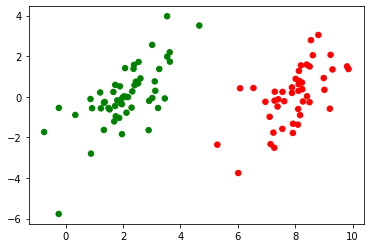

In [4]:
plt.figure(figsize=(6,4))
cm_dark = mpl.colors.ListedColormap(['g','r'])
plt.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)
plt.show()

**3.$\alpha$ 的选取**

In [5]:
# 随机选择一个不等于i值的j
def selectJrand(i,m):     # i表示选中的alpha1,m表示样本数
    j = i
    while j==i:
        j = int(random.uniform(0,m))
    return j

$
\alpha_{new}^{(2)}=\begin{cases}
H,&\alpha_{new}^{(2)}>H \\ 
\alpha_{new}^{(2)},&L \le \alpha_{new}^{(2)}\le H \\ 
L,&\alpha_{new}^{(2)}<L
\end{cases}$  

In [6]:
def clipAlpha(a_j,H,L):
    if a_j > H:
        a_j = H
    elif a_j < L:
        a_j = L
    return a_j

**4.SMO算法的核心实现**

In [7]:
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):     # X，y，C，误差，最大迭代次数
    dataMatrix = np.mat(dataMatIn); labelMat = np.mat(classLabels).transpose()
    #初始化b为0
    b = 0; 
    #获取数据维度
    m,n = np.shape(dataMatrix)
    #初始化所有alpha为0
    alphas = np.mat(np.zeros((m,1)))
    iter = 0
    #迭代求解
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            #计算g(xi)
            gXi = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            #计算Ei
            Ei = gXi - float(labelMat[i])
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                #随机选择一个待优化的alpha（先随机出alpha下标）
                j = selectJrand(i,m)
                #计算g(xj)
                gXj = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                #计算Ej
                Ej = gXj - float(labelMat[j])
                #把原来的alpha值复制，作为old值
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                #计算上下界
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                #计算-eta
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                #计算alpha[j]，为了和公式对应把j看出2
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                #剪辑alpha[j]，为了和公式对应把j看出2
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); continue
                #计算alpha[i] ，为了和公式对应把j看出1
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                #计算b1
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                #计算b2
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #求解b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print("iteration number: %d" % iter)
    return b,alphas

**5.计算w**  

$$w^*=\sum_{i=1}^m \alpha^{(i)^*}y^{(i)}x^{(i)}$$

In [8]:
def calcWs(alphas,dataArr,classLabels):
    X = np.mat(dataArr); labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(X)
    #初始化w都为1
    w = np.zeros((n,1))
    #循环计算
    for i in range(m):
        w += np.multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

**6.调用上述方法，求解w,b,alpha**

In [9]:
b,alphas = smoSimple(X,y,0.6,0.001,40)
w = calcWs(alphas,X,y)
print('b=',b)
print('alphas=',alphas)
print('w=',w)

iter: 0 i:0, pairs changed 1
iter: 0 i:3, pairs changed 2
L==H
j not moving enough
L==H
L==H
j not moving enough
iter: 0 i:12, pairs changed 3
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
L==H
iter: 0 i:46, pairs changed 4
iter: 0 i:52, pairs changed 5
j not moving enough
L==H
j not moving enough
L==H
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
L==H
iter: 0 i:6, pairs changed 1
L==H
L==H
j not moving enough
L==H
j not moving enough
L==H
iter: 0 i:17, pairs changed 2
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:27, pairs changed 3
L==H
iter: 0 i:30, pairs changed 4
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:55, pairs changed 5
j not moving enough
L==H
iter: 0 i:76, pairs changed 6
iter: 0 i:77, pairs changed 7
j not moving enough
j not moving enough
L==H
iteration number: 0
j not moving 

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:54, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 1 i:29, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough


j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough


iteration number: 16
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 17
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 18
j not moving enough
L==H
j not moving enough
iter: 18 i:52, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
L==H
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
L==H
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
L==H
j not moving enough
j not moving enough
iteration number: 7
j not 

j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
iter: 11 i:55, pairs changed 1
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:54, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
iteration number:

j not moving enough
iteration number: 21
j not moving enough
j not moving enough
iteration number: 22
j not moving enough
j not moving enough
iteration number: 23
j not moving enough
j not moving enough
iteration number: 24
j not moving enough
j not moving enough
iteration number: 25
j not moving enough
j not moving enough
iteration number: 26
j not moving enough
j not moving enough
iteration number: 27
j not moving enough
j not moving enough
iteration number: 28
iter: 28 i:17, pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
iter: 3 i:55, pairs changed 1
iteration number: 0
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
iteration number: 3
j not movin

j not moving enough
j not moving enough
iteration number: 20
j not moving enough
j not moving enough
iteration number: 21
j not moving enough
j not moving enough
iteration number: 22
j not moving enough
j not moving enough
iteration number: 23
j not moving enough
j not moving enough
iteration number: 24
j not moving enough
j not moving enough
iteration number: 25
j not moving enough
j not moving enough
iteration number: 26
j not moving enough
j not moving enough
iteration number: 27
j not moving enough
j not moving enough
iteration number: 28
j not moving enough
j not moving enough
iteration number: 29
j not moving enough
j not moving enough
iteration number: 30
j not moving enough
j not moving enough
iteration number: 31
j not moving enough
j not moving enough
iteration number: 32
j not moving enough
j not moving enough
iteration number: 33
j not moving enough
j not moving enough
iteration number: 34
j not moving enough
j not moving enough
iteration number: 35
j not moving enough
j no

**7.画决策平面**

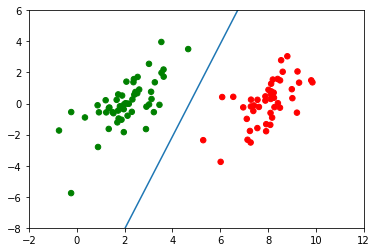

In [10]:
plt.figure(figsize=(6,4))
cm_dark = mpl.colors.ListedColormap(['g','r'])
plt.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

xx = np.arange(-2,12,0.1)
yy = (-w[0]*xx-b)/w[1]
plt.plot(xx,yy.reshape(-1,1))
plt.axis([-2,12,-8,6])
plt.show()

**8.画支持向量**

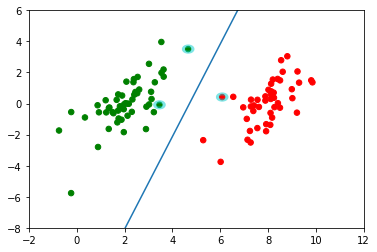

In [11]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g','r'])
ax.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

xx = np.arange(-2,12,0.1)
yy = (-w[0]*xx-b)/w[1]
plt.plot(xx,yy.reshape(-1,1))
plt.axis([-2,12,-8,6])

nozero = np.where(alphas>0)
for i in nozero[0]:
    circle = Circle((X[i][0], X[i][1]), 0.2, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
plt.show()

## 改进版

**1.定义一个新的数据结构**

In [12]:
class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler):
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = np.shape(dataMatIn)[0]
        self.alphas = np.mat(np.zeros((self.m,1)))
        self.b = 0
        self.eCache = np.mat(np.zeros((self.m,2)))   #第一列是标志位，0无效 1有效，第二列是Ei值

**2.计算Ei的方法**

In [13]:
def calcEk(oS, k):      # oS是上面定义的数据结构
    fXk = float(np.multiply(oS.alphas,oS.labelMat).T*(oS.X*oS.X[k,:].T)) + oS.b
    Ek = fXk - float(oS.labelMat[k])
    return Ek

**3.选择第二个待优化的alpha j，选择一个误差最大的alpha j**

In [14]:
def selectJ(i, oS, Ei):
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #设为有效
    validEcacheList = np.nonzero(oS.eCache[:,0].A)[0]   # .A是将矩阵转化为数组，np.nonzero返回的是元组
    if (len(validEcacheList)) > 1:   # 如果不大于1，说明第一列除了第i行全是0
        for k in validEcacheList:   #迭代所有有效的缓存，找到误差最大的E
            if k == i: continue #不选择和i相等的值
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        print("maxK=",maxK)
        return maxK, Ej
    else:   #第一次循环时是没有有效的缓存值的，所以随机选一个(仅会执行一次)
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

**4.更新缓存**

In [15]:
def updateEk(oS, k):
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]
    print("update:",k)

In [16]:
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #这里不再是随机选取了
        print(f"i,j={i},{j}")
        alphaIold = oS.alphas[i].copy(); 
        alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: 
            print("L==H"); 
            return 0
        eta = 2.0 * oS.X[i,:]*oS.X[j,:].T - oS.X[i,:]*oS.X[i,:].T - oS.X[j,:]*oS.X[j,:].T
        if eta >= 0: 
            print("eta>=0"); 
            return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #这里增加了更新缓存的方法
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])
        updateEk(oS, i) #这里增加了更新缓存的方法
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[i,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[i,:]*oS.X[j,:].T
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[j,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[j,:]*oS.X[j,:].T
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): 
            oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): 
            oS.b = b2
        else: 
            oS.b = (b1 + b2)/2.0
        return 1
    else: return 0

**5.完整的改进后的SMO算法**

In [17]:
def smoP(dataMatIn, classLabels, C, toler, maxIter):
    oS = optStruct(np.mat(dataMatIn),np.mat(classLabels).transpose(),C,toler)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #遍历全部数据集
            for i in range(oS.m):
                alphaPairsChanged += innerL(i,oS)
                print(oS.eCache)
                print("fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
        else:#遍历非边界数据集
            nonBoundIs = np.nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print("non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
        if entireSet: entireSet = False #进行切换
        elif (alphaPairsChanged == 0): entireSet = True
        print("iteration number: %d" % iter)
    return oS.b,oS.alphas

In [18]:
def calcWs(alphas,dataArr,classLabels):
    X = np.mat(dataArr); labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(X)
    w = np.zeros((n,1))
    for i in range(m):
        w += np.multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

In [19]:
dataMat,labelMat = loaddata('data/svm1.txt')
b,alphas = smoP(dataMat,labelMat,0.6,0.001,40)
w = calcWs(alphas,dataMat,labelMat)

i,j=0,64
update: 64
update: 0
[[1.         1.80487618]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.     

C:\Users\gaoyu\AppData\Local\Temp/ipykernel_6556/1680920640.py:3: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  oS.eCache[i] = [1,Ei]  #设为有效


[[ 1.         -0.36603655]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.23809502]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.0863329 ]
 [ 0.          0.        ]
 [ 1.          0.16670254]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.47222146]
 [ 1.          0.27310409]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.57482238]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.16623186]
 [ 1.         -0.27403713]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.04949302]
 [ 0.          0.        ]
 [ 0.          0.        ]
 

[[ 1.          0.43593754]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.59741545]
 [ 1.         -0.42617915]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.07628876]
 [ 1.          0.12656424]
 [ 0.          0.        ]
 [ 1.          1.22359142]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.03712767]
 [ 1.          1.07921868]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.06325484]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.16623186]
 [ 1.         -0.27403713]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.04949302]
 [ 0.          0.        ]
 [ 0.          0.        ]
 

[[ 1.          0.43593754]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.59741545]
 [ 1.         -0.42617915]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.07628876]
 [ 1.          0.12656424]
 [ 0.          0.        ]
 [ 1.          1.22359142]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.03712767]
 [ 1.          1.07921868]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.06325484]
 [ 1.          0.35562653]
 [ 0.          0.        ]
 [ 1.         -0.16623186]
 [ 1.         -0.27403713]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.35705193]
 [ 1.          0.04909226]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.04949302]
 [ 0.          0.        ]
 [ 0.          0.        ]
 

j not moving enough
[[ 1.         -0.28656657]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.59741545]
 [ 1.         -0.42617915]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.07628876]
 [ 1.          0.12656424]
 [ 0.          0.        ]
 [ 1.          1.22359142]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.03712767]
 [ 1.          1.07921868]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.06325484]
 [ 1.          0.35562653]
 [ 0.          0.        ]
 [ 1.         -0.16623186]
 [ 1.         -0.27403713]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          0.35705193]
 [ 1.          0.04909226]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.         -0.04949302]
 [ 0.          0.        ]
 [ 0.   

In [20]:
print('b=',b)
print('alphas=',alphas)
print('w=',w)

b= [[-3.06127512]]
alphas= [[ 6.15853583e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.74487251e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 9.50903157e-02]
 [ 7.28503191e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.46944695e-18]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0

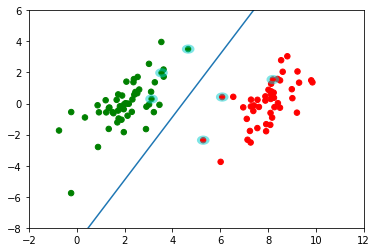

In [21]:
#画图
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(np.array(dataMat)[:,0],np.array(dataMat)[:,1],c=np.array(labelMat).squeeze(),cmap=cm_dark,s=30)

#画决策平面
x = np.arange(-2.0, 12.0, 0.1)
y = (-w[0]*x - b)/w[1]
ax.plot(x,y.reshape(-1,1))
ax.axis([-2,12,-8,6])

###########
#画支持向量
alphas_non_zeros_index = np.where(alphas>0)
for i in alphas_non_zeros_index[0]:
    circle = Circle((dataMat[i][0], dataMat[i][1]), 0.2, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
plt.show()

## 加入核函数

$$k(x,z)=\exp (-\frac{\left \| x-z \right\| ^2}{2\sigma^2})$$

In [22]:
#核函数，kTup第一列表示是线性核还是高斯核，第二列是高斯核的标准差
def kernelTrans(X, A, kTup):
    m, n = np.shape(X)
    K = np.mat(np.zeros((m, 1)))
    if kTup[0] == 'lin':#线性核
        K = X * A.T
    elif kTup[0] == 'rbf':#高斯核
        for j in range(m):
            deltaRow = X[j, :] - A
            K[j] = deltaRow * deltaRow.T
        K = np.exp(K / (-2 * kTup[1] ** 2)) 
    else:
        raise NameError('Houston We Have a Problem -- \
    That Kernel is not recognized')
    return K

In [23]:
class optStruct:
    def __init__(self, dataMatIn, classLabels, C, toler, kTup):
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = np.shape(dataMatIn)[0]
        self.alphas = np.mat(np.zeros((self.m, 1)))
        self.b = 0
        self.eCache = np.mat(np.zeros((self.m, 2))) #第一列是标志位，0无效 1有效
        self.K = np.mat(np.zeros((self.m, self.m)))
        for i in range(self.m):
            self.K[:, i] = kernelTrans(self.X, self.X[i, :], kTup)

In [24]:
def calcEk(oS, k):
    fXk = float(np.multiply(oS.alphas, oS.labelMat).T * oS.K[:, k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek

In [25]:
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i] * Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or (
            (oS.labelMat[i] * Ei > oS.tol) and (oS.alphas[i] > 0)):
        j, Ej = selectJ(i, oS, Ei)  #这里不再是随机选取了
        alphaIold = oS.alphas[i].copy()
        alphaJold = oS.alphas[j].copy()
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L == H: print("L==H");return 0
        eta = 2.0 * oS.K[i, j] - oS.K[i, i] - oS.K[j, j]  # 这里的计算要使用核函数了
        if eta >= 0: print("eta>=0"); return 0
        oS.alphas[j] -= oS.labelMat[j] * (Ei - Ej) / eta
        oS.alphas[j] = clipAlpha(oS.alphas[j], H, L)
        updateEk(oS, j)  #这里增加了更新缓存的方法
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print("j not moving enough");return 0
        oS.alphas[i] += oS.labelMat[j] * oS.labelMat[i] * (alphaJold - oS.alphas[j])
        updateEk(oS, i)  #这里增加了更新缓存的方法
        b1 = oS.b - Ei - oS.labelMat[i] * (oS.alphas[i] - alphaIold) * oS.K[i, i] - oS.labelMat[j] * (
                    oS.alphas[j] - alphaJold) * oS.K[i, j]
        b2 = oS.b - Ej - oS.labelMat[i] * (oS.alphas[i] - alphaIold) * oS.K[i, j] - oS.labelMat[j] * (
                    oS.alphas[j] - alphaJold) * oS.K[j, j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]):
            oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]):
            oS.b = b2
        else:
            oS.b = (b1 + b2) / 2.0
        return 1
    else:
        return 0

In [26]:
#完整的改进后的使用核函数的SMO算法
def smo(dataMatIn, classLabels, C, toler, maxIter, kTup=('lin', 0)):
    oS = optStruct(np.mat(dataMatIn), np.mat(classLabels).transpose(), C, toler, kTup)
    iter = 0
    entireSet = True
    alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:  #遍历全部数据集
            for i in range(oS.m):
                alphaPairsChanged += innerL(i, oS)
                print("fullSet, iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
            iter += 1
        else:  #遍历非边界数据集
            nonBoundIs = np.nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i, oS)
                print("non-bound, iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
            iter += 1
        if entireSet:
            entireSet = False  #进行切换
        elif (alphaPairsChanged == 0):
            entireSet = True
        print("iteration number: %d" % iter)
    return oS.b, oS.alphas

In [27]:
dataMat,labelMat = loaddata('data/svm2.txt')
b,alphas = smo(dataMat,labelMat,200,0.0001,10000,('rbf',1.3))
w = calcWs(alphas,dataMat,labelMat)
print('b=',b)
print('alphas=',alphas)
print('w=',w)

update: 64
update: 0
fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 1
maxK= 0
update: 0
update: 2
fullSet, iter: 0 i:2, pairs changed 2
maxK= 2
update: 2
update: 3
fullSet, iter: 0 i:3, pairs changed 3
fullSet, iter: 0 i:4, pairs changed 3
maxK= 2
update: 2
update: 5
fullSet, iter: 0 i:5, pairs changed 4
fullSet, iter: 0 i:6, pairs changed 4
maxK= 2
update: 2
update: 7
fullSet, iter: 0 i:7, pairs changed 5
fullSet, iter: 0 i:8, pairs changed 5
fullSet, iter: 0 i:9, pairs changed 5
maxK= 5
update: 5
update: 10
fullSet, iter: 0 i:10, pairs changed 6
maxK= 10
update: 10
update: 11
fullSet, iter: 0 i:11, pairs changed 7
fullSet, iter: 0 i:12, pairs changed 7
maxK= 7
update: 7
update: 13
fullSet, iter: 0 i:13, pairs changed 8
maxK= 5
update: 5
update: 14
fullSet, iter: 0 i:14, pairs changed 9
maxK= 5
update: 5
update: 15
fullSet, iter: 0 i:15, pairs changed 10
maxK= 0
update: 0
update: 16
fullSet, iter: 0 i:16, pairs changed 11
maxK= 14
update: 14
update: 17
fullS

maxK= 24
update: 24
j not moving enough
non-bound, iter: 2 i:41, pairs changed 3
maxK= 24
update: 24
j not moving enough
non-bound, iter: 2 i:44, pairs changed 3
maxK= 24
update: 24
j not moving enough
non-bound, iter: 2 i:45, pairs changed 3
maxK= 21
update: 21
update: 46
non-bound, iter: 2 i:46, pairs changed 4
maxK= 5
update: 5
j not moving enough
non-bound, iter: 2 i:62, pairs changed 4
maxK= 5
update: 5
j not moving enough
non-bound, iter: 2 i:64, pairs changed 4
maxK= 5
update: 5
j not moving enough
non-bound, iter: 2 i:76, pairs changed 4
iteration number: 3
maxK= 5
update: 5
j not moving enough
non-bound, iter: 3 i:10, pairs changed 0
maxK= 5
update: 5
j not moving enough
non-bound, iter: 3 i:13, pairs changed 0
maxK= 5
update: 5
j not moving enough
non-bound, iter: 3 i:14, pairs changed 0
maxK= 5
update: 5
j not moving enough
non-bound, iter: 3 i:16, pairs changed 0
maxK= 5
update: 5
j not moving enough
non-bound, iter: 3 i:17, pairs changed 0
non-bound, iter: 3 i:21, pairs ch

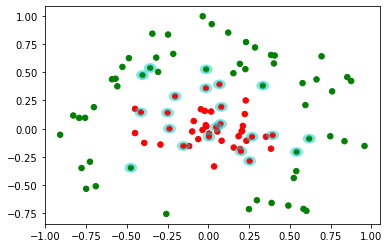

In [28]:
#画图
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(np.array(dataMat)[:,0],np.array(dataMat)[:,1],c=np.array(labelMat).squeeze(),cmap=cm_dark,s=30)
#画支持向量
alphas_non_zeros_index = np.where(alphas>0)
for i in alphas_non_zeros_index[0]:
    circle = Circle((dataMat[i][0], dataMat[i][1]), 0.03, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
plt.show()

# sklearn实现SVM

## LinearSVC（运行速度更快）

In [29]:
from sklearn.svm import LinearSVC

In [30]:
X,y = loaddata('data/svm1.txt')

In [31]:
#定义模型
model = LinearSVC(C=1)
#fit数据
model.fit(X,y)
#获取b值
b=model.intercept_
#获取w值
w = model.coef_
print('b=',b)
print('w=',w)

b= [-2.12429773]
w= [[ 0.43605439 -0.20628471]]


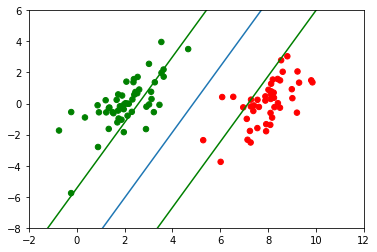

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)
#画决策平面
x0 = np.arange(-2.0, 12.0, 0.1)
x1 = (-w[0][0]*x0 - b)/w[0][1]
ax.plot(x0,x1.reshape(-1,1))

#画间隔平面
pos0 = np.arange(-2.0, 12.0, 0.1)
pos1 = (1-w[0][0]*pos0 - b)/w[0][1]
ax.plot(pos0,pos1.reshape(-1,1),color="green")

neg0 = np.arange(-2.0, 12.0, 0.1)
neg1 = (-1-w[0][0]*neg0 - b)/w[0][1]
ax.plot(neg0,neg1.reshape(-1,1),color="green")

ax.axis([-2,12,-8,6])
plt.show()

## SVC（可用于非线性数据）

In [33]:
from sklearn.svm import SVC

### 线性核

In [34]:
model = SVC(C=1,kernel='linear')
model.fit(X,y)
b=model.intercept_
w=model.coef_
print('b=',b)
print('w=',w)

b= [-3.83775658]
w= [[ 0.81444269 -0.27274371]]


In [35]:
print(model.predict(np.array([[7.886242,0.191813]])))

[1.]


In [36]:
print('各类别各有多少个支持向量',model.n_support_)
print('各类别的支持向量在训练样本中的索引',model.support_)
print('各类所有的支持向量',model.support_vectors_)
print('支持向量的alpha值',model.dual_coef_)

各类别各有多少个支持向量 [2 1]
各类别的支持向量在训练样本中的索引 [17 29 55]
各类所有的支持向量 [[ 4.658191  3.507396]
 [ 3.457096 -0.082216]
 [ 6.080573  0.418886]]
支持向量的alpha值 [[-0.12746518 -0.24133564  0.36880082]]


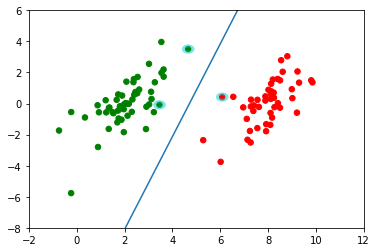

In [37]:
#画图
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

x1 = np.arange(-2.0, 12.0, 0.1)
x2 = (-w[0][0]*x1 - b)/w[0][1]
ax.plot(x1,x2.reshape(-1,1))
ax.axis([-2,12,-8,6])

#画支持向量
alphas_non_zeros_index = model.support_
for i in alphas_non_zeros_index:
    circle = Circle((X[i][0], X[i][1]), 0.2, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
plt.show()

### 高斯核

In [38]:
X,y = loaddata('data/svm2.txt')
model = SVC(C=1,kernel='rbf')    #参数gama=1/sigma
model.fit(X,y)

SVC(C=1)

In [39]:
print('各类别各有多少个支持向量',model.n_support_)
print('各类别的支持向量在训练样本中的索引',model.support_)
print('各类所有的支持向量',model.support_vectors_)
print('支持向量的值',model.dual_coef_)

各类别各有多少个支持向量 [16 12]
各类别的支持向量在训练样本中的索引 [ 6 21 27 30 36 41 42 48 53 58 65 76 78 85 87 99 14 18 19 23 26 29 34 45
 54 56 62 74]
各类所有的支持向量 [[-0.557789  0.375797]
 [-0.475167 -0.346247]
 [ 0.61908  -0.088188]
 [ 0.539368 -0.374972]
 [-0.403483  0.474466]
 [-0.012998  0.525985]
 [ 0.153738  0.491531]
 [-0.7016    0.190983]
 [ 0.595222  0.20957 ]
 [-0.307768  0.503038]
 [-0.755431  0.096711]
 [ 0.334204  0.381237]
 [ 0.227222  0.527437]
 [ 0.297885 -0.632874]
 [ 0.541359 -0.205969]
 [-0.725568 -0.292022]
 [-0.413576  0.145681]
 [-0.392868 -0.125261]
 [ 0.353588 -0.070617]
 [ 0.394164 -0.058217]
 [-0.449349 -0.038074]
 [-0.015165  0.359326]
 [ 0.253289 -0.285861]
 [ 0.068286  0.392741]
 [ 0.229465  0.250409]
 [ 0.3843   -0.17657 ]
 [-0.203272  0.286855]
 [-0.448939  0.176725]]
支持向量的值 [[-0.41958351 -1.         -1.         -0.76568057 -0.87441932 -1.
  -1.         -1.         -0.44300379 -1.         -0.38183024 -1.
  -0.09168169 -0.61099064 -1.         -0.41281024  1.          1.
   1.         

In [40]:
import warnings
warnings.filterwarnings('ignore')

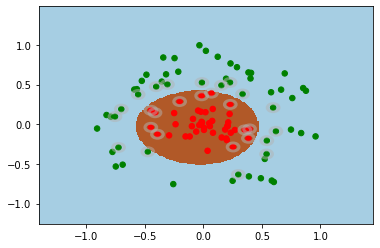

In [41]:
#画图
fig = plt.figure()
ax = fig.add_subplot(111)

#画决策边界
h = .01
x_min, x_max = np.array(X)[:, 0].min() - .5, np.array(X)[:, 0].max() + .5
y_min, y_max = np.array(X)[:, 1].min() - .5, np.array(X)[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

#画数据点
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
plt.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)
#画支持向量
alphas_non_zeros_index = model.support_
for i in alphas_non_zeros_index:
    circle = Circle((X[i][0], X[i][1]), 0.05, facecolor='none', edgecolor=(0.7,0.7,0.7), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
plt.show()

## 调参

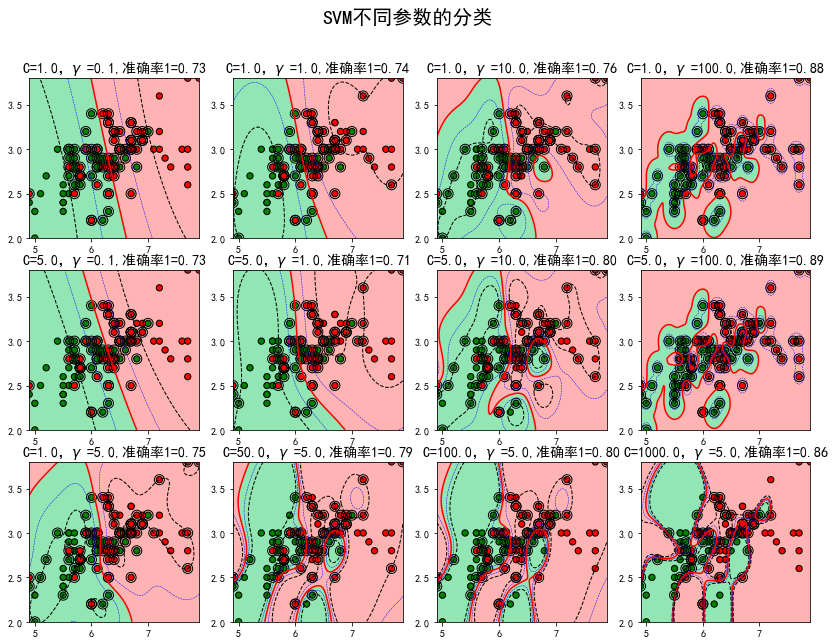

In [42]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt


if __name__ == "__main__":
    data = pd.read_csv('data/svm3.txt', sep='\t', header=None)
    x, y = data[[0, 1]], data[2]

    # 分类器
    clf_param = (('rbf', 1, 0.1), ('rbf', 1, 1), ('rbf', 1, 10), ('rbf', 1, 100),
                ('rbf', 5, 0.1), ('rbf', 5, 1), ('rbf', 5, 10), ('rbf', 5, 100),
    ('rbf', 1, 5), ('rbf', 50, 5), ('rbf', 100, 5), ('rbf', 1000,5))
    x1_min, x2_min = np.min(x, axis=0)
    x1_max, x2_max = np.max(x, axis=0)
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    grid_test = np.stack((x1.flat, x2.flat), axis=1)

    cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r'])
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(14, 10), facecolor='w')
    for i, param in enumerate(clf_param):
        clf = svm.SVC(C=param[1], kernel=param[0])
        clf.gamma = param[2]
#         if param[0] == 'rbf':
#             clf.gamma = param[2]
#             title = u'高斯核，C=%.1f，$\gamma$ =%.1f' % (param[1], param[2])
#         else:
#             title = u'线性核，C=%.1f' % param[1]

        clf.fit(x, y)
        y_hat = clf.predict(x)
#         print(u'准确率：', accuracy_score(y, y_hat))
        title = u'C=%.1f，$\gamma$ =%.1f,准确率1=%.2f' % (param[1], param[2],accuracy_score(y, y_hat))
        # 画图
#         print(title)
#         print(u'支撑向量的数目：', clf.n_support_)
#         print(u'支撑向量的系数：', clf.dual_coef_)
#         print(u'支撑向量：', clf.support_)
        plt.subplot(3, 4, i+1)
        grid_hat = clf.predict(grid_test)       # 预测分类值
        grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
        plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
        plt.scatter(x[0], x[1], c=y, edgecolors='k', s=40, cmap=cm_dark)      # 样本的显示
        plt.scatter(x.loc[clf.support_, 0], x.loc[clf.support_, 1], edgecolors='k', facecolors='none', s=100, marker='o')   # 支撑向量
        z = clf.decision_function(grid_test)

        z = z.reshape(x1.shape)
        plt.contour(x1, x2, z, colors=list('kbrbk'), linestyles=['--', '--', '-', '--', '--'],
                    linewidths=[1, 0.5, 1.5, 0.5, 1], levels=[-1, -0.5, 0, 0.5, 1])

        plt.xlim(x1_min, x1_max)
        plt.ylim(x2_min, x2_max)
        plt.title(title, fontsize=14)

    plt.suptitle(u'SVM不同参数的分类', fontsize=20)
#     plt.tight_layout(1.4)
#     plt.subplots_adjust(top=0.92)
    plt.show()

C: 惩罚系数，用来控制损失函数的惩罚系数，类似于LR中的正则化系数。C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样会出现训练集测试时准确率很高，但泛化能力弱，容易导致过拟合。 C值小，对误分类的惩罚减小，容错能力增强，泛化能力较强，但也可能欠拟合。

gamma: 核函数系数，该参数是rbf，poly和sigmoid的内核系数；默认是'auto'，那么将会使用特征位数的倒数，即1 / n_features。（即核函数的带宽，超圆的半径）。gamma越大，σ越小，使得高斯分布又高又瘦，造成模型只能作用于支持向量附近，可能导致过拟合；反之，gamma越小，σ越大，高斯分布会过于平滑，在训练集上分类效果不佳，可能导致欠拟合。

# 案例：使用SVM进行人脸识别

## 下载数据

In [43]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)     # 取出有60张以上照片的人
print(faces.data.shape)      # 因为算法接收的是二维向量，所以把照片大小拉伸成一维向量
print(faces.target_names)
print(faces.images.shape)    # 1348个人，每张照片直接抠出了人脸，大小是62*47

(1348, 2914)
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


## 数据分析

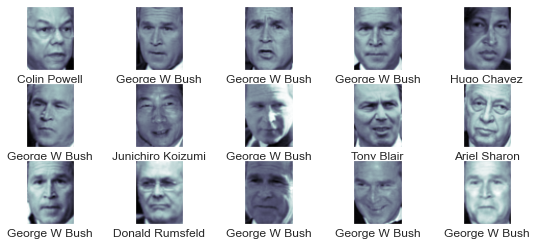

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 画一些人脸，看看需要处理的数据
fig, ax = plt.subplots(3,5)
fig.subplots_adjust(left=0.0625, right=1.2, wspace=1)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
plt.show()

In [45]:
# 提取更有意义的特征。这里使用主成份分析来提取150个基本元素，然后将其提供给支持向量机分类器
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf')
# 将这个预处理和分类器打包成管道
model = make_pipeline(pca, svc)

## 交叉检验

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(faces.data,faces.target,random_state=42)

用网络搜索交叉检验来寻找最优参数组合。通过不断调整 $C$（松弛变量）和参数 $\gamma$（控制径向基函数核的大小），确定最优模型

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1,5,10,50], 'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


## 预测

In [48]:
model = grid.best_estimator_
y_fit = model.predict(X_test)

## 评价模型

Text(0.5, 0.98, '预测错误的名字用红色标注')

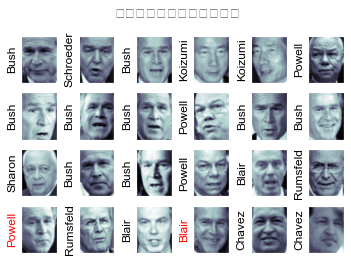

In [49]:
# 比较预测结果和真实结果
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_fit[i]].split()[-1],
                  color='black' if y_fit[i] == y_test[i] else 'red')
fig.suptitle('预测错误的名字用红色标注', size=14)

打印分类效果报告，列举每个标签的统计结果，从而对评估器的性能有更全面的认识

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_fit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.67      0.67        15
     Colin Powell       0.82      0.85      0.83        68
  Donald Rumsfeld       0.82      0.74      0.78        31
    George W Bush       0.89      0.87      0.88       126
Gerhard Schroeder       0.79      0.83      0.81        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.92      0.92      0.92        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.82      0.82       337
     weighted avg       0.85      0.85      0.84       337



画出混淆矩阵，帮助我们清晰的判断哪些标签容易被分类器误判

Text(89.18, 0.5, 'predicted label')

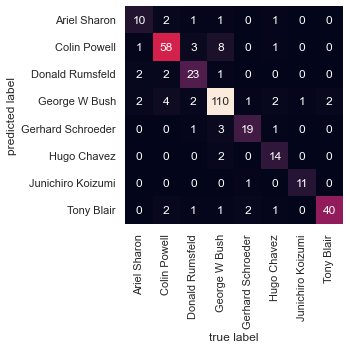

In [51]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')